<a href="https://www.kaggle.com/code/kelvinnyongesa/data-visualization-avocado-prices?scriptVersionId=133377646" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](http://i.imgur.com/y5bvNsy.png)

- <a href='#1'>1. Introduction</a>  
- <a href='#2'>2. Loading libraries and retrieving data</a>
- <a href='#3'>3. Understanding the Data</a>
- <a href='#4'>4.  Data Visualization</a>


# <a id='1'>1. Introduction</a>


## Background

Avocados are the darling of the produce section. They’re the go-to ingredient for guacamole dips at parties. And they're also turning up in everything from salads and wraps to smoothies and even brownies

## Data 

Starting in 2013, the table  reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

## Objective

In this notebook, we will try to analyze the dataset to understand how millenials are buying avocados.


# <a id='2'>2. Loading libraries and retrieving data</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

# <a id='3'>3. Understanding the data</a>

In [2]:
df = pd.read_csv('../input/avocado.csv')
df.head(4)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

In [4]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:

# Split Date into 3 different columns

df['Year'], df['Month'],  df['Day'] = df['Date'].str.split('-').str


# <a id='4'>4. Data Visualization</a>





**Organic vs Conventional** : The main difference between organic and conventional food products are the chemicals involved during production and processing. The interest in organic food products has been rising steadily over the recent years with new health super fruits emerging. Let's see if this is also the case with our dataset

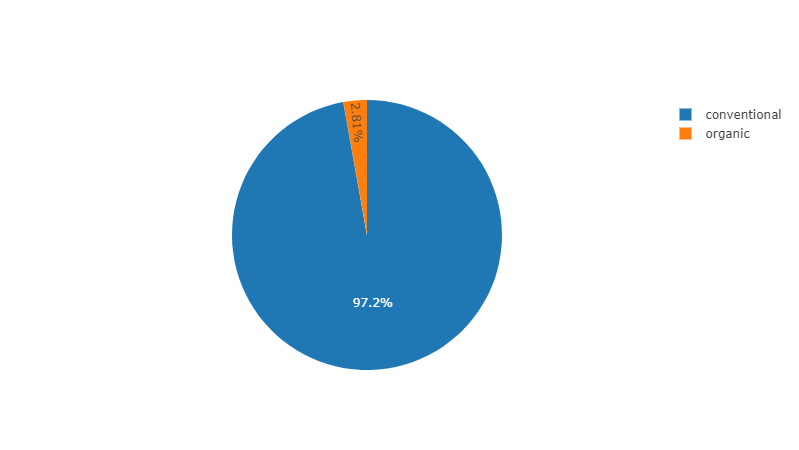

In [7]:
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

Just over 2% of our dataset is organic. 

Now, let's look at the average price distribution

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



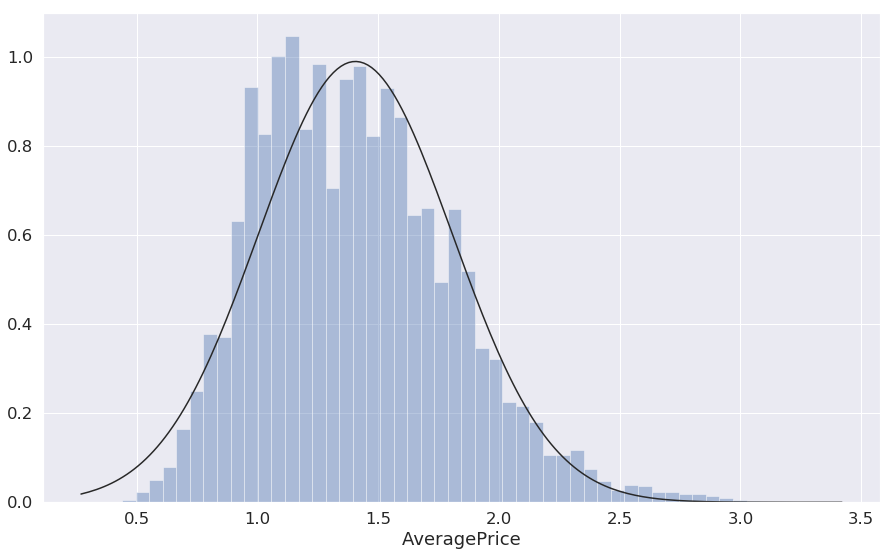

In [8]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

Let's look at average price of conventional vs. organic. 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



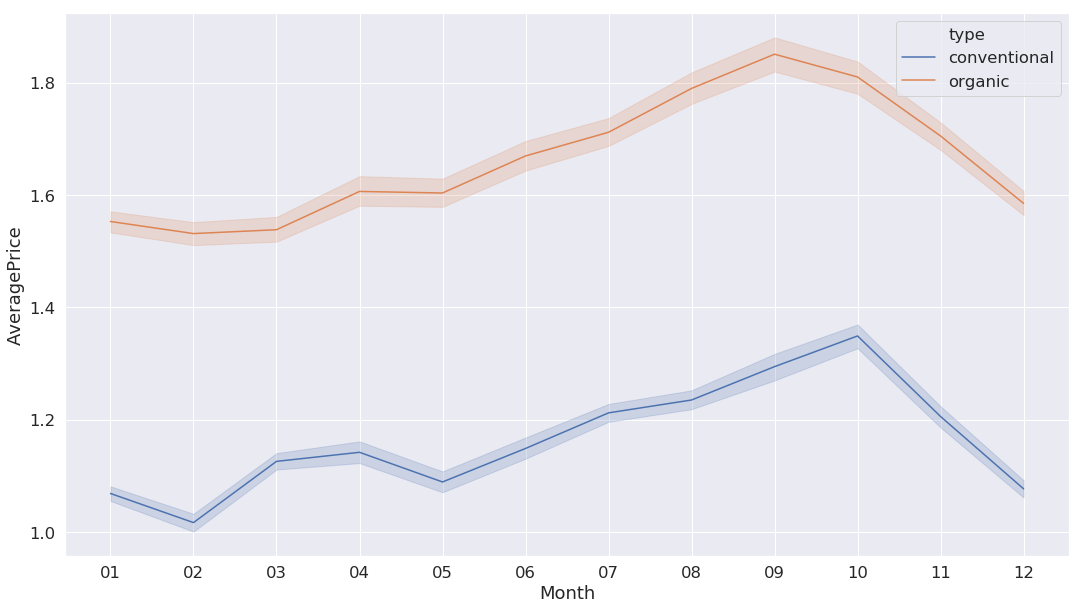

In [9]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

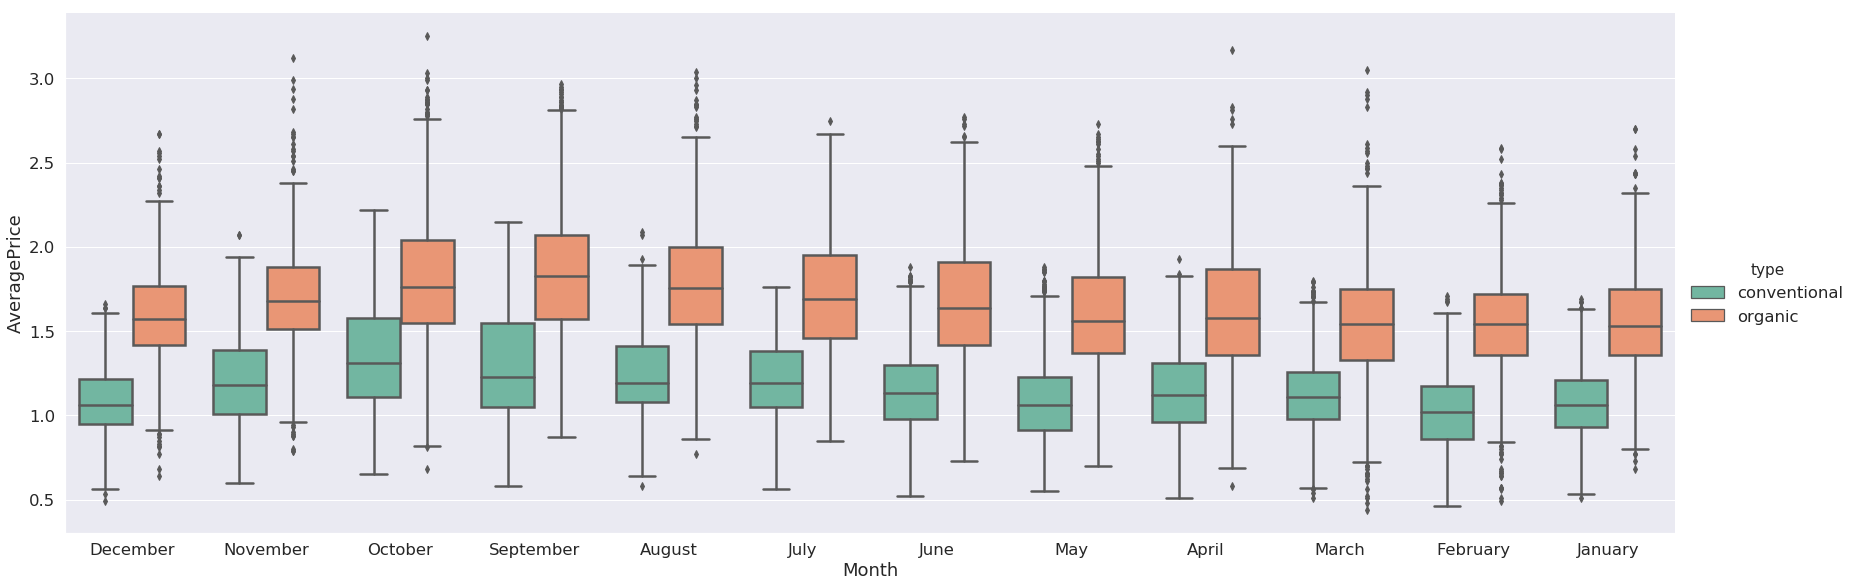

In [10]:
df['Month'] = df['Month'].replace({'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', 
                                   '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', 
                                   '11': 'November', '12': 'December'})


ax = sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8.5, linewidth=2.5, aspect=2.8,palette="Set2");

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



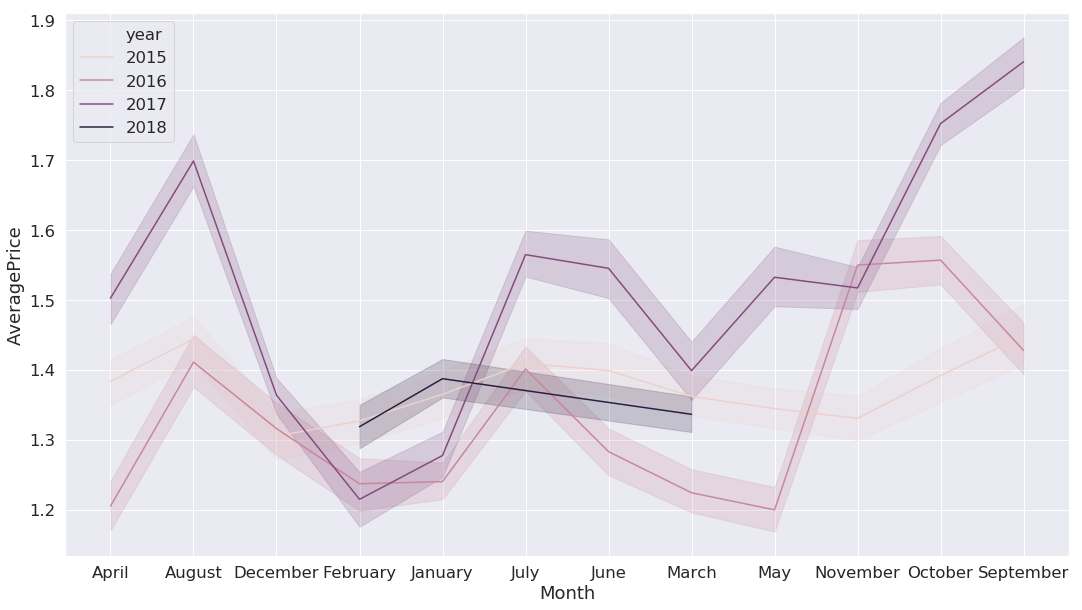

In [11]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='year',  data=df)
plt.show()

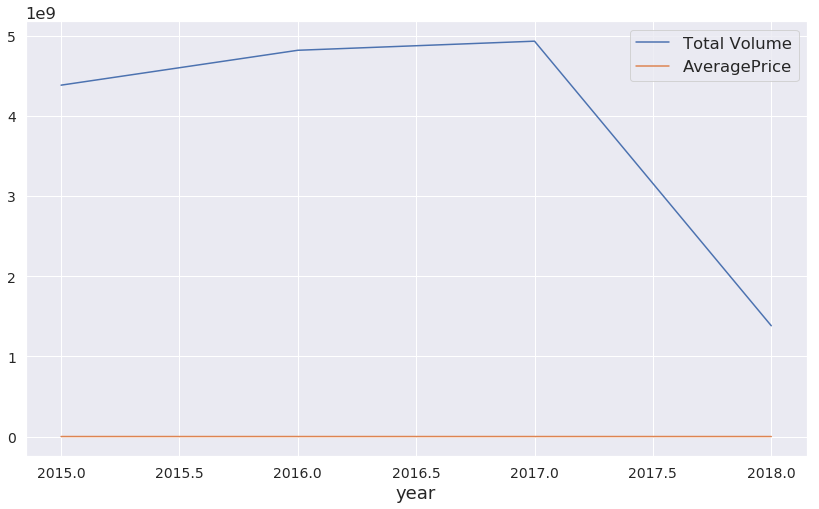

In [12]:
Year = df[['Total Volume' ,'AveragePrice']].groupby(df.year).sum()
Year.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()


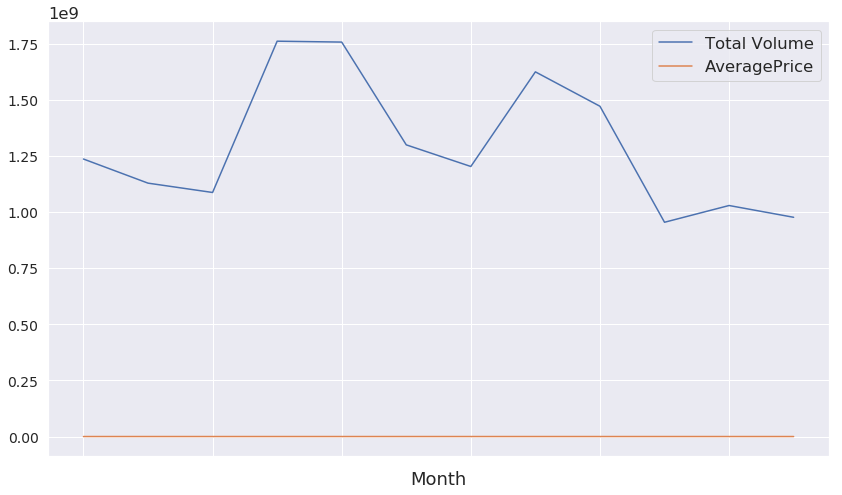

In [13]:
Month = df[['Total Volume', 'AveragePrice']].groupby(df.Month).sum()
Month.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

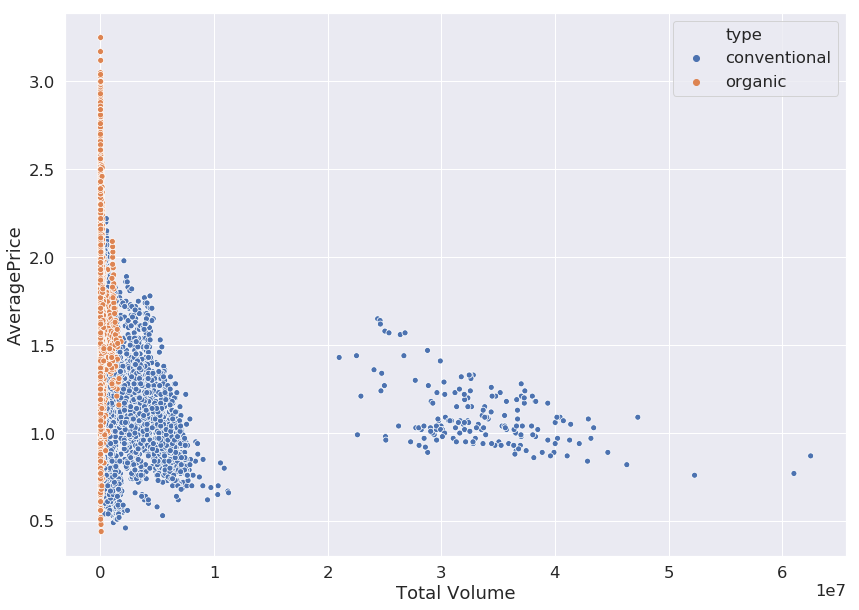

In [14]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='Total Volume', y = 'AveragePrice', hue= 'type', data= df)

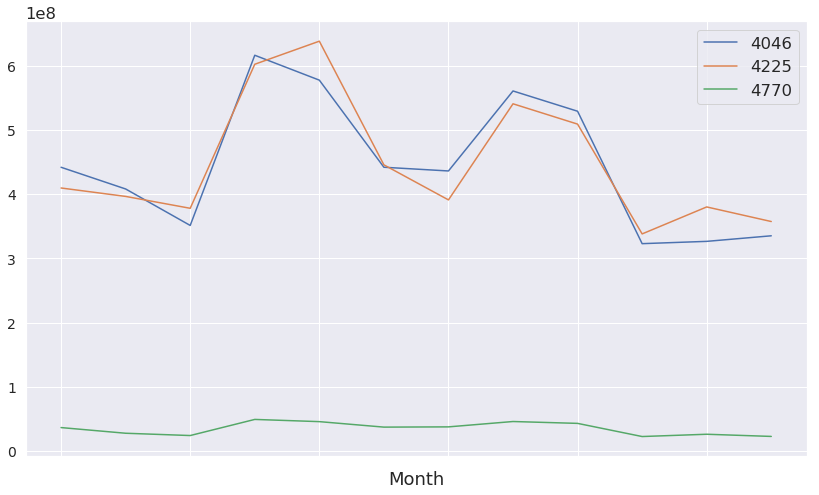

In [15]:
variant = df[['4046', '4225', '4770']].groupby(df.Month).sum()
variant.plot(kind='line', fontsize = 14, figsize=(14,8))

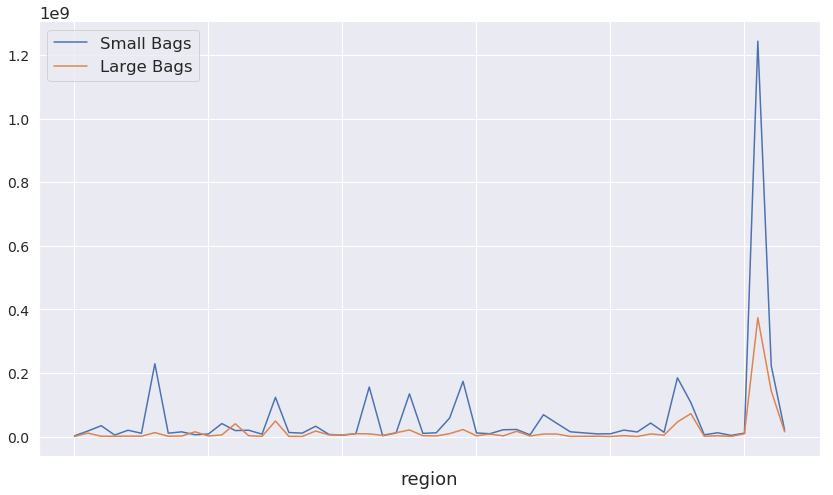

In [16]:
Bags = df[['Small Bags', 'Large Bags']].groupby(df.region).sum()
Bags.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

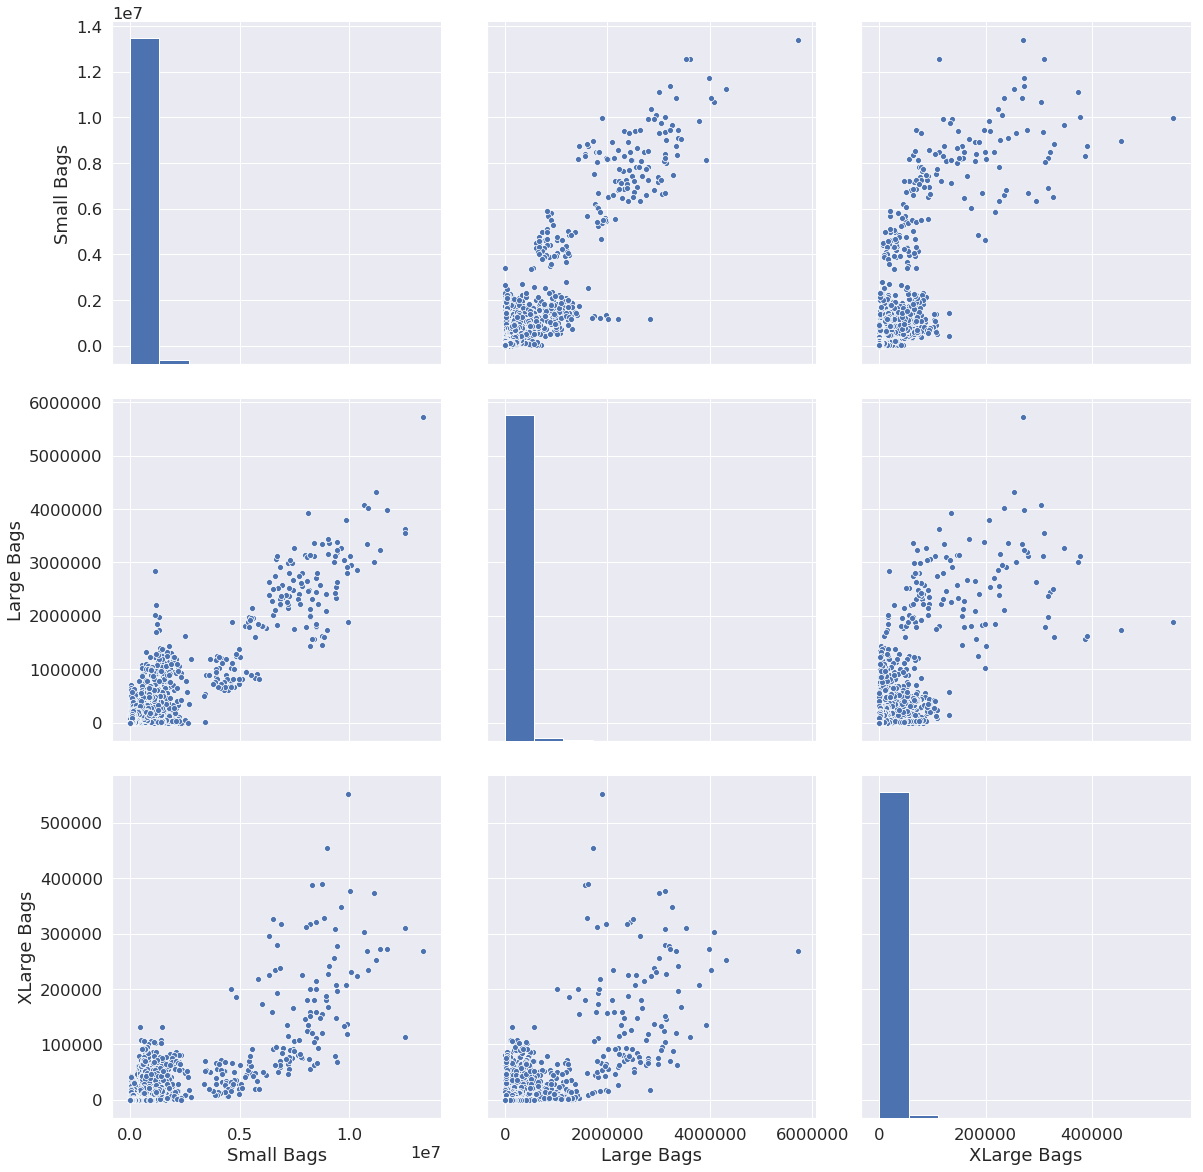

In [17]:
sns.pairplot(df.iloc[:,8:11], palette="husl",height=5.5)

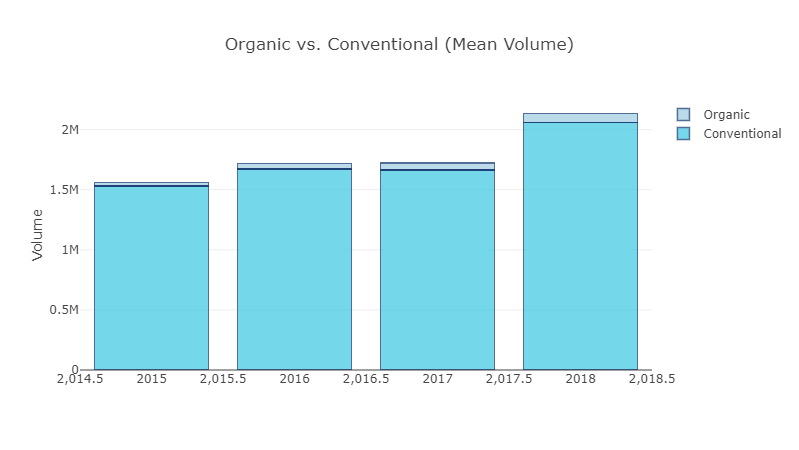

In [18]:
con=df[df['type']=='conventional'].groupby('year')['Total Volume'].agg('mean')
org=df[df['type']=='organic'].groupby('year')['Total Volume'].agg('mean')

trace1=go.Bar(x=con.index,y=con,name="Conventional",
             marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.7)

trace2=go.Bar(x=con.index,y=org,name="Organic",
             marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.7)

data=[trace1,trace2]

layout=go.Layout(barmode="stack",title="Organic vs. Conventional (Mean Volume)",
                yaxis=dict(title="Volume"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [19]:
df.groupby(['region','year'],as_index=False)['Total Volume'].agg('mean')

,region,year,Total Volume
0,Albany,2015,3.874900e+04
1,Albany,2016,5.061861e+04
2,Albany,2017,4.935455e+04
3,Albany,2018,6.424942e+04
4,Atlanta,2015,2.233817e+05
5,Atlanta,2016,2.723738e+05
6,Atlanta,2017,2.718408e+05
7,Atlanta,2018,3.429759e+05
8,BaltimoreWashington,2015,3.908229e+05
9,BaltimoreWashington,2016,3.932096e+05


Text(0.5,1,'Average Price of Avocado According to Region')

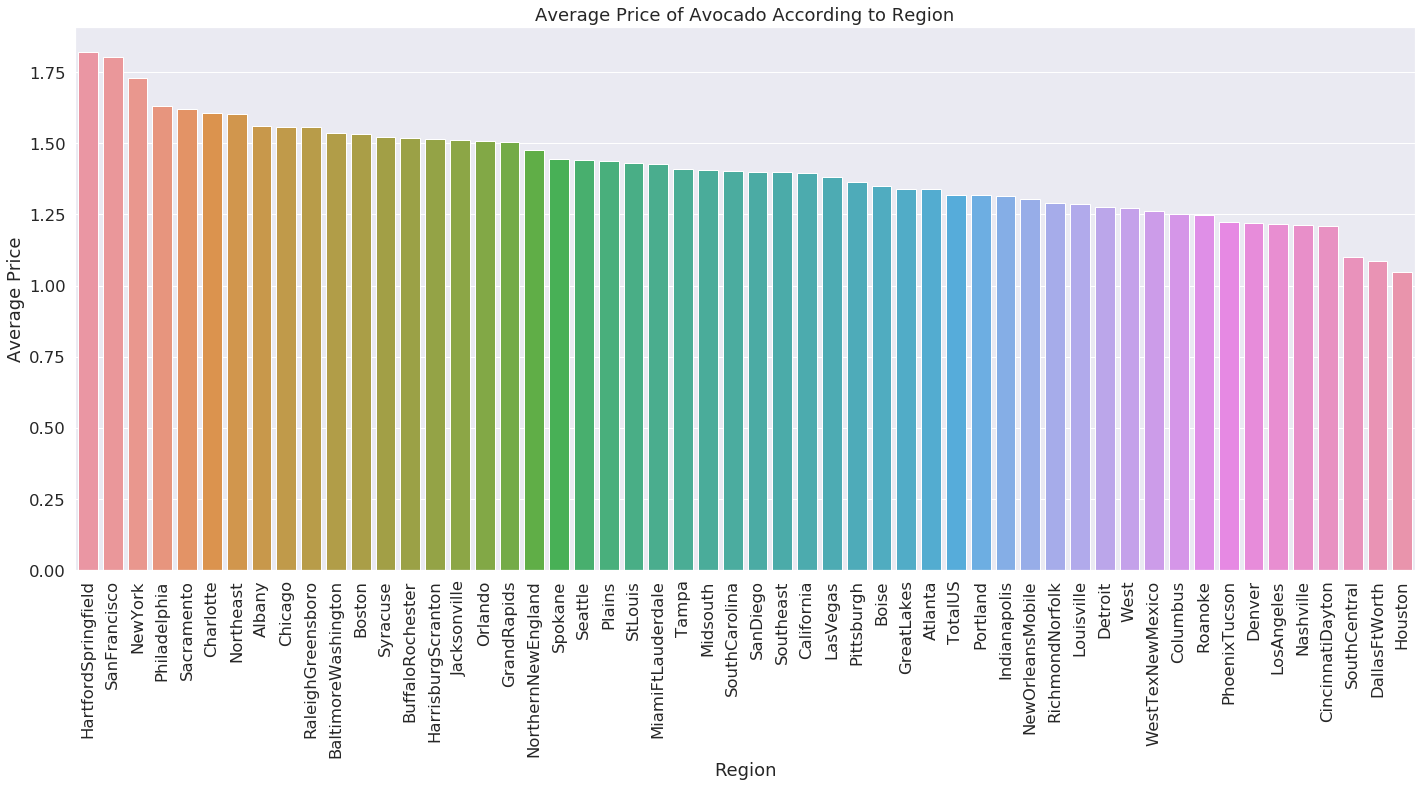

In [20]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5,1,'Average of Total Volume According to Region')

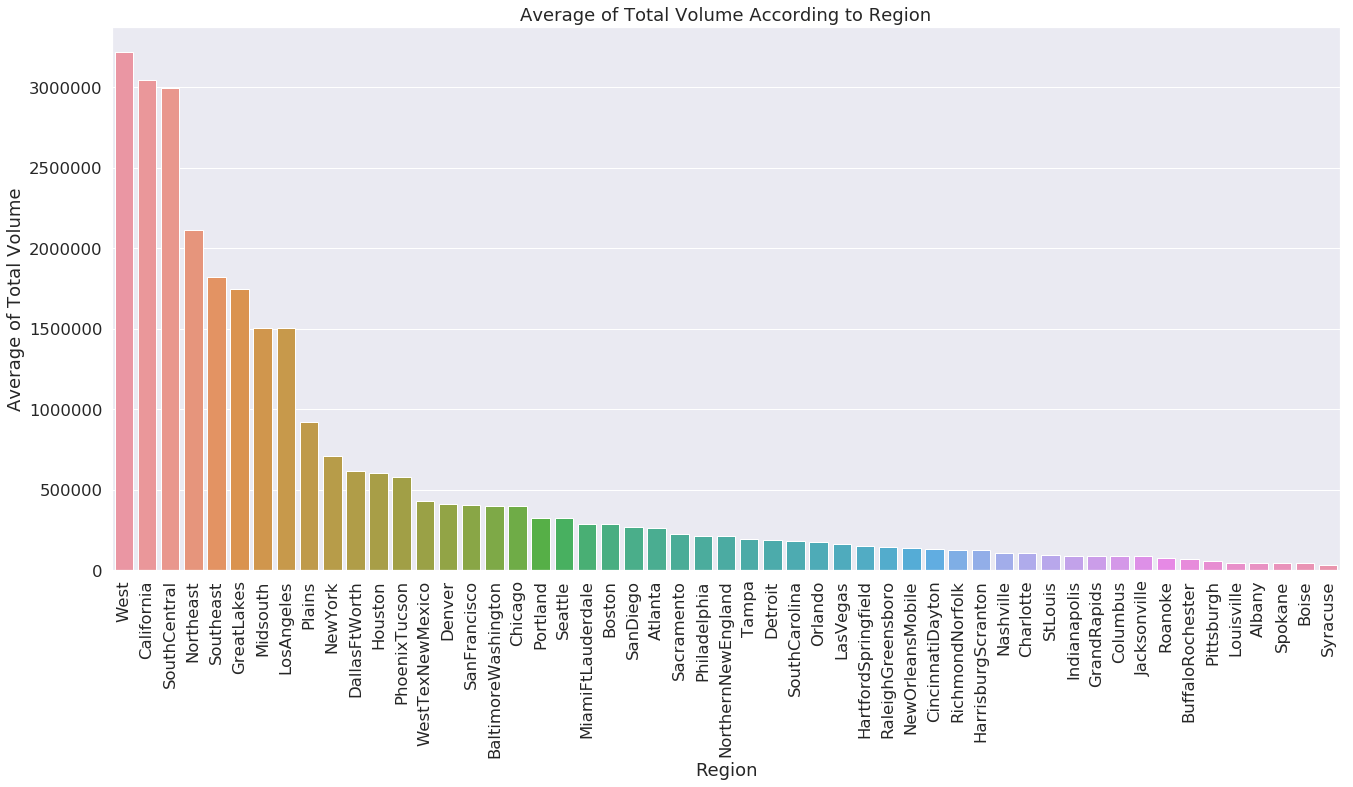

In [21]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



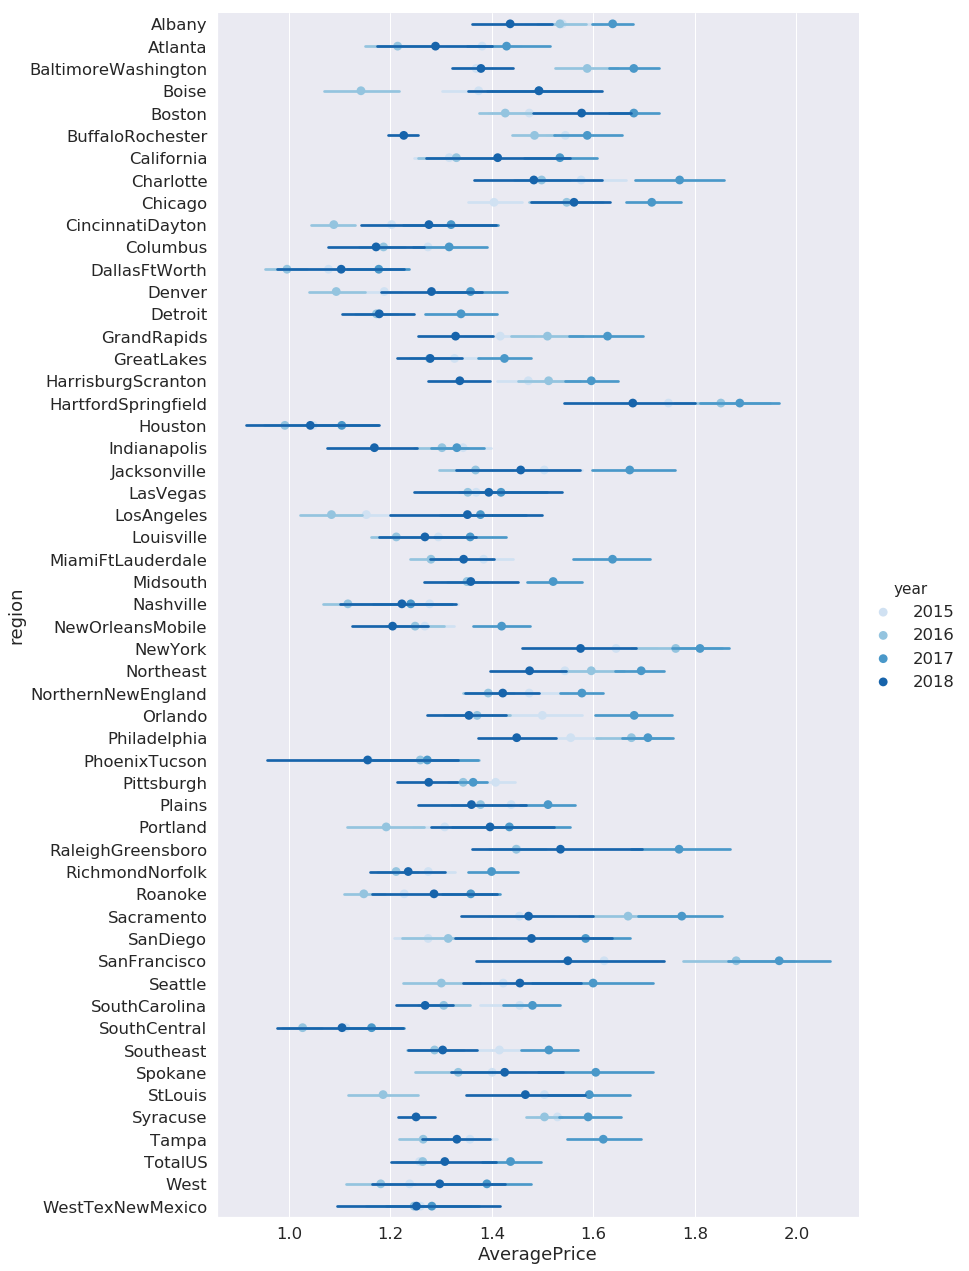

In [22]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

Conclusion:

*  There are several More visualization plot one can use 
